In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np
sys.path.append("../")


def plot_chunk(mic_signals,
               labels,
               room,
               chunk_start=2,
               chunk_duration=1e-2,
               base_sr=32000):
    #plt.figure(figsize=(10, 5))
    
    n_mics = mic_signals.shape[0]
    start = int(base_sr*chunk_start)
    end = start + int(base_sr*chunk_duration)
    num_points = end - start
    x_axis = 1000*np.arange(num_points)/base_sr
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.locator_params(axis="x", nbins=12)
    
    for i, mic_signal in enumerate(mic_signals):
        ax1.plot(x_axis,
                 mic_signal[start:end],
                 label=labels[i])
        ax1.set_xlabel('Time (ms)')
    ax1.legend()
    
    plot_room_2d(room, ax=ax2)
    #plt.tight_layout()

    plt.show()


In [2]:
from copy import copy

from pyroomasync import ConnectedShoeBox, simulate
from pyroomasync.utils.visualization import plot_room_2d


room_dims = [4, 5, 3]
sr_mic_1 = 32000
coords_mic_1 = [3, 2, 1]
coords_source = [2, 1, 1]
delay_mic_1 = 0

def simulate_and_plot(sr_offset_mic_2, delay_mic_2, dist_mic_2):
    # Create room
    room = ConnectedShoeBox([4, 5, 3], fs=32000)
    coords_mic_2 = copy(coords_mic_1)
    # Change y coord of mic_2
    coords_mic_2[1] = coords_mic_2[1] + dist_mic_2
    
    # Add microphones with their sampling frequencies and latencies
    room.add_microphone(coords_mic_1, fs_offset=0, delay=delay_mic_1)
    room.add_microphone(coords_mic_2, fs_offset=sr_offset_mic_2, delay=delay_mic_2)

    # Add a source
    room.add_source(coords_source, "data/vctk/p225_002.wav")

    # simulate and get the results recorded in the microphones
    simulation_results = simulate(room)

    labels=[
        f"sr_offset=0, delay={delay_mic_1}",
        f"sr_offset={sr_offset_mic_2}, delay={delay_mic_2}"
    ]
    plot_chunk(simulation_results, labels, room)

## Interative simulation 

In [3]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

interactive(children=(IntSlider(value=0, description='sr'), IntSlider(value=0, description='delay_in_ms', max=…

<function __main__.update(sr=32000, delay_in_ms=0, dist_in_m=0)>

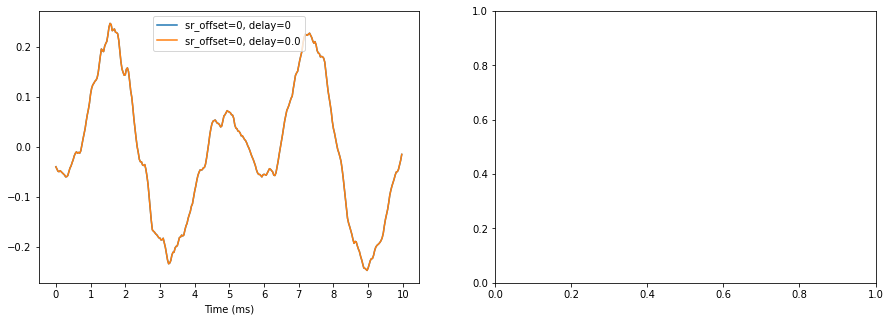

In [4]:
from ipywidgets import *

sr_offset_slider = IntSlider(min=0, max=100, step=1, value=0)
distance_slider = FloatSlider(min=0, max=1, step=0.03)
delay_slider = IntSlider(min=0, max=20, step=1)

def update(sr=sr_mic_1, delay_in_ms=0, dist_in_m=0):
    simulate_and_plot(sr, delay_in_ms/1000, dist_in_m)

interact(update,
         sr=sr_offset_slider,
         delay_in_ms=delay_slider,
         dist_in_m=distance_slider)